
# Análise de Volatilidade Financeira em Séries Temporais 📊

Notebook dedicado à exploração e modelagem da volatilidade em ativos financeiros.  
Inclui cálculo de métricas de risco, estudo de séries temporais e simulações de cenários.

---


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-965c7b414b77>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacao_usdbrl.rename(columns={'Date': 'data', 'Close': 'USD/BRL'}, inplace=True)


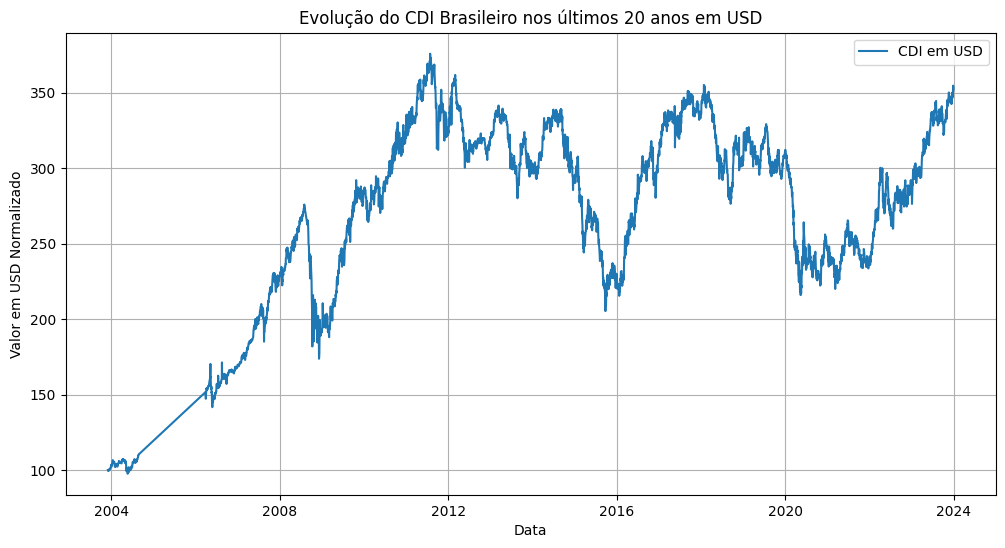

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import requests
import yfinance as yf

# Configurar a exibição de gráficos no notebook
%matplotlib inline
# Definir as datas de início e fim
data_inicial = '01/01/2003'  # Há 20 anos
data_final = '31/12/2023'    # Data atual ou desejada

# URL para obter os dados do CDI do Banco Central
url_cdi = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.12/dados?formato=csv&dataInicial={data_inicial}&dataFinal={data_final}'

# Fazer o download dos dados do CDI
cdi = pd.read_csv(url_cdi, sep=';', decimal=',')

# Converter a coluna 'data' para datetime
cdi['data'] = pd.to_datetime(cdi['data'], dayfirst=True)

# Renomear a coluna 'valor' para 'CDI' e converter para decimal
cdi.rename(columns={'valor': 'CDI'}, inplace=True)
cdi['CDI'] = cdi['CDI'] / 100  # Converter de percentual para decimal

# Exibir as primeiras linhas do dataframe do CDI
cdi.head()
# Obter os dados da taxa de câmbio USD/BRL do Yahoo Finance
cotacao_usdbrl = yf.download('BRL=X', start='2003-01-01', end='2023-12-31')

# Resetar o índice para que a data seja uma coluna
cotacao_usdbrl.reset_index(inplace=True)

# Selecionar apenas as colunas necessárias
cotacao_usdbrl = cotacao_usdbrl[['Date', 'Close']]

# Renomear as colunas
cotacao_usdbrl.rename(columns={'Date': 'data', 'Close': 'USD/BRL'}, inplace=True)

# Exibir as primeiras linhas do dataframe de câmbio
cotacao_usdbrl.head()
# Unir os dataframes pelo campo 'data'
df = pd.merge(cdi, cotacao_usdbrl, on='data', how='inner')

# Ordenar por data
df.sort_values('data', inplace=True)

# Exibir as primeiras linhas do dataframe combinado
df.head()
# Calcular o retorno acumulado do CDI
df['Retorno CDI Acumulado'] = (1 + df['CDI']).cumprod()

# Calcular o valor acumulado em USD
df['Valor em USD'] = df['Retorno CDI Acumulado'] / df['USD/BRL']

# Normalizar o valor inicial para 100
df['Valor em USD Normalizado'] = df['Valor em USD'] / df['Valor em USD'].iloc[0] * 100

# Exibir as primeiras linhas com os novos cálculos
df.head()
# Plotar o gráfico
plt.figure(figsize=(12,6))
plt.plot(df['data'], df['Valor em USD Normalizado'], label='CDI em USD')
plt.title('Evolução do CDI Brasileiro nos últimos 20 anos em USD')
plt.xlabel('Data')
plt.ylabel('Valor em USD Normalizado')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Primeiro, certifique-se de instalar o yfinance
!pip install yfinance --upgrade --no-cache-dir

import yfinance as yf
import pandas as pd

# Definir o ticker das ações
tickers = ['ASAI3.SA', 'CRFB3.SA']

# Baixar os dados históricos
data = yf.download(tickers, start='2023-01-01', end=None)['Adj Close']

# Períodos de dias para calcular a correlação
periods = [15, 30, 60, 120, 240]

# Função para calcular a correlação
def calculate_correlation(data, days):
    return data.tail(days).corr().iloc[0, 1]

# Dicionário para armazenar as correlações
correlations = {}

# Calcular a correlação para cada período
for period in periods:
    correlations[f'{period} dias'] = calculate_correlation(data, period)

# Converter o resultado em DataFrame para melhor visualização
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlação'])

# Mostrar os resultados
print(correlation_df)


[*********************100%%**********************]  2 of 2 completed

          Correlação
15 dias     0.877530
30 dias     0.848092
60 dias     0.522845
120 dias    0.864160
240 dias    0.828176


Obtendo dados para o período de 100 dias...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABEV3.SA']: YFInvalidPeriodError("%ticker%: Period '100d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZO34.SA']: YFInvalidPeriodError("%ticker%: Period '100d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASAI3.SA']: YFInvalidPeriodError("%ticker%: Period '100d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BBOI11.SA']: YFInvalidPeriodError("%ticker

Matriz de correlação para o período de 100 dias:
           ABEV3.SA  AMZO34.SA  ASAI3.SA  BBOI11.SA  BTLT39.SA  GOGL34.SA  \
ABEV3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
AMZO34.SA       NaN        NaN       NaN        NaN        NaN        NaN   
ASAI3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
BBOI11.SA       NaN        NaN       NaN        NaN        NaN        NaN   
BTLT39.SA       NaN        NaN       NaN        NaN        NaN        NaN   
GOGL34.SA       NaN        NaN       NaN        NaN        NaN        NaN   
MSFT34.SA       NaN        NaN       NaN        NaN        NaN        NaN   
RRRP3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
GGBR4           NaN        NaN       NaN        NaN        NaN        NaN   
PCAR3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
POMO4.SA        NaN        NaN       NaN        NaN        NaN        NaN   
SYNE3.SA        NaN        

<ipython-input-1-94aa42196b45>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


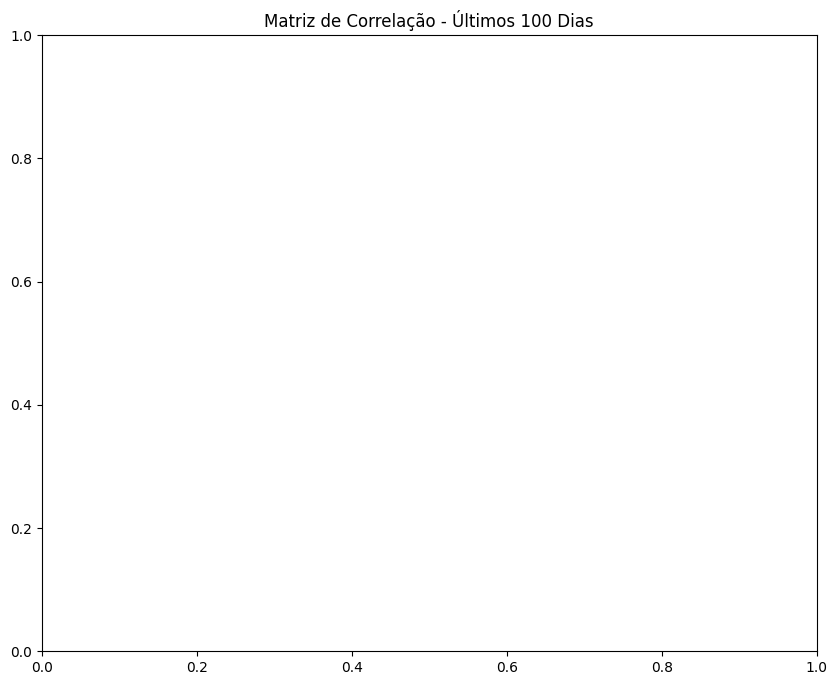

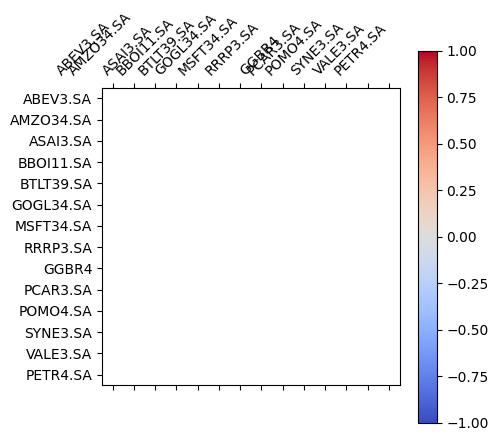

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABEV3.SA']: YFInvalidPeriodError("%ticker%: Period '300d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZO34.SA']: YFInvalidPeriodError("%ticker%: Period '300d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Obtendo dados para o período de 300 dias...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASAI3.SA']: YFInvalidPeriodError("%ticker%: Period '300d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BBOI11.SA']: YFInvalidPeriodError("%ticker%: Period '300d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BTLT39.SA']: YFInvalidPeriodError("%ticker%: Period '300d' is invalid, must be one of ['1d', '5d']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOGL34.SA']: YFInvalidPeriodError("%ticker%: Period '300d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 

Matriz de correlação para o período de 300 dias:
           ABEV3.SA  AMZO34.SA  ASAI3.SA  BBOI11.SA  BTLT39.SA  GOGL34.SA  \
ABEV3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
AMZO34.SA       NaN        NaN       NaN        NaN        NaN        NaN   
ASAI3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
BBOI11.SA       NaN        NaN       NaN        NaN        NaN        NaN   
BTLT39.SA       NaN        NaN       NaN        NaN        NaN        NaN   
GOGL34.SA       NaN        NaN       NaN        NaN        NaN        NaN   
MSFT34.SA       NaN        NaN       NaN        NaN        NaN        NaN   
RRRP3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
GGBR4           NaN        NaN       NaN        NaN        NaN        NaN   
PCAR3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
POMO4.SA        NaN        NaN       NaN        NaN        NaN        NaN   
SYNE3.SA        NaN        

<ipython-input-1-94aa42196b45>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


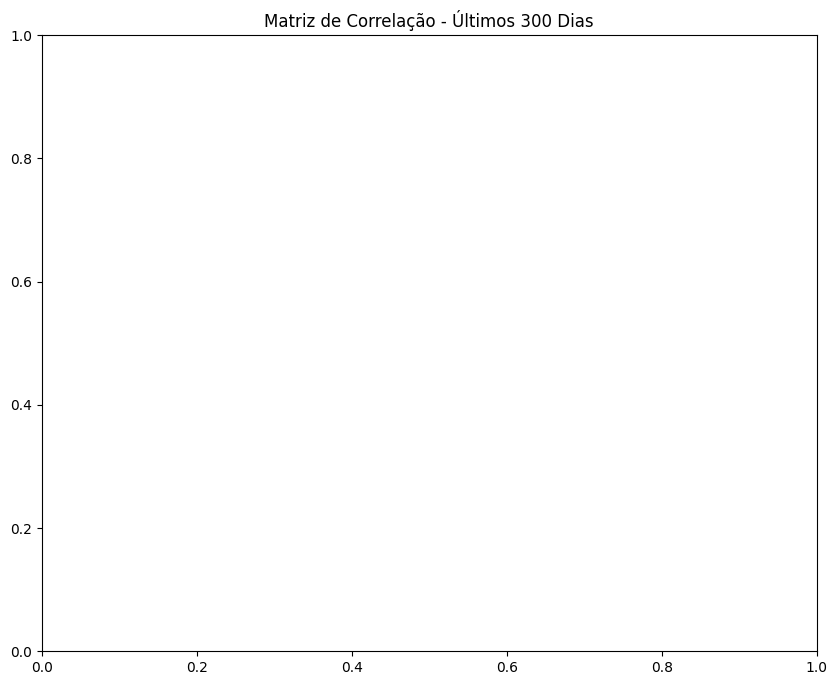

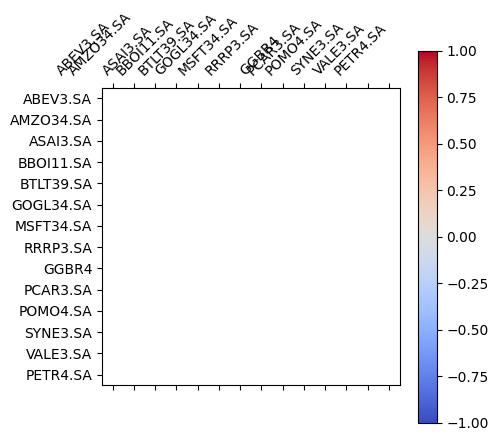

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABEV3.SA']: YFInvalidPeriodError("%ticker%: Period '600d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Obtendo dados para o período de 600 dias...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZO34.SA']: YFInvalidPeriodError("%ticker%: Period '600d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASAI3.SA']: YFInvalidPeriodError("%ticker%: Period '600d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BBOI11.SA']: YFInvalidPeriodError("%ticker%: Period '600d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BTLT39.SA']: YFInvalidPeriodError("%ticker%: Period '600d' i

Não foi possível obter dados para MSFT34.SA: 'MSFT34.SA'
Não foi possível obter dados para GGBR4: 'GGBR4'


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GGBR4']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=600d) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCAR3.SA']: YFInvalidPeriodError("%ticker%: Period '600d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['POMO4.SA']: YFInvalidPeriodError("%ticker%: Period '600d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNE3.SA']: YFInvalidPeriodError("%ticker%

Não foi possível obter dados para PCAR3.SA: 'PCAR3.SA'
Não foi possível obter dados para POMO4.SA: 'POMO4.SA'
Não foi possível obter dados para SYNE3.SA: 'SYNE3.SA'
Não foi possível obter dados para VALE3.SA: 'VALE3.SA'


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VALE3.SA']: YFInvalidPeriodError("%ticker%: Period '600d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Matriz de correlação para o período de 600 dias:
           ABEV3.SA  AMZO34.SA  ASAI3.SA  BBOI11.SA  BTLT39.SA  GOGL34.SA  \
ABEV3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
AMZO34.SA       NaN        NaN       NaN        NaN        NaN        NaN   
ASAI3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
BBOI11.SA       NaN        NaN       NaN        NaN        NaN        NaN   
BTLT39.SA       NaN        NaN       NaN        NaN        NaN        NaN   
GOGL34.SA       NaN        NaN       NaN        NaN        NaN        NaN   
RRRP3.SA        NaN        NaN       NaN        NaN        NaN        NaN   
PETR4.SA        NaN        NaN       NaN        NaN        NaN        NaN   

           RRRP3.SA  PETR4.SA  
ABEV3.SA        NaN       NaN  
AMZO34.SA       NaN       NaN  
ASAI3.SA        NaN       NaN  
BBOI11.SA       NaN       NaN  
BTLT39.SA       NaN       NaN  
GOGL34.SA       NaN       NaN  
RRRP3.SA        NaN       NaN  
P

<ipython-input-1-94aa42196b45>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


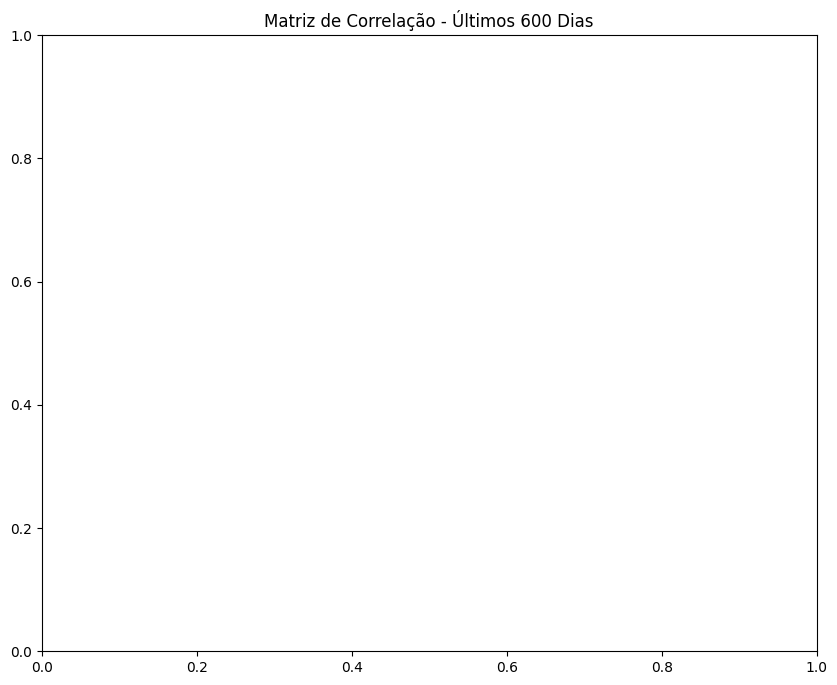

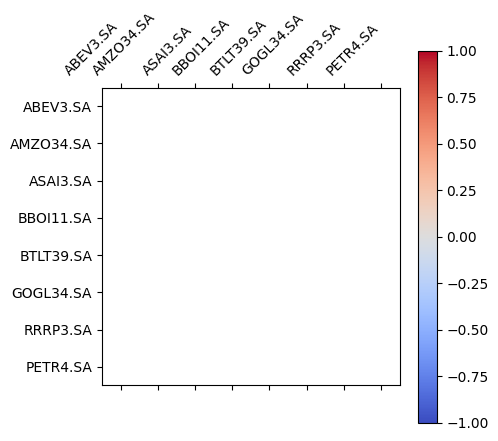

In [ ]:
# Instalar as bibliotecas necessárias
!pip install yfinance pandas matplotlib

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Lista das ações a serem analisadas
acoes = ['ABEV3.SA', 'AMZO34.SA', 'ASAI3.SA', 'BBOI11.SA', 'BTLT39.SA', 'GOGL34.SA', 'MSFT34.SA', 'RRRP3.SA', 'GGBR4', 'PCAR3.SA', 'POMO4.SA', 'SYNE3.SA', 'VALE3.SA', 'PETR4.SA',]

# Função para obter dados históricos e calcular a matriz de correlação
def calcular_correlacao(acoes, periodos):
    resultados = {}
    for periodo in periodos:
        print(f"Obtendo dados para o período de {periodo} dias...")
        data = {}
        for acao in acoes:
            try:
                dados = yf.download(acao, period=f'{periodo}d', interval='1d')
                data[acao] = dados['Adj Close']
            except Exception as e:
                print(f"Não foi possível obter dados para {acao}: {e}")

        if not data:
            print("Nenhum dado foi obtido.")
            continue

        df = pd.DataFrame(data)
        matriz_correlacao = df.corr()
        resultados[periodo] = matriz_correlacao

        # Exibir a matriz de correlação
        print(f"Matriz de correlação para o período de {periodo} dias:")
        print(matriz_correlacao)

        # Calcular e exibir os coeficientes de correlação
        for i in range(len(df.columns)):
            for j in range(i + 1, len(df.columns)):
                acao1 = df.columns[i]
                acao2 = df.columns[j]
                coeficiente = matriz_correlacao.loc[acao1, acao2]
                print(f"Coeficiente de correlação entre {acao1} e {acao2}: {coeficiente:.2f}")

        # Plotar a matriz de correlação
        plt.figure(figsize=(10, 8))
        plt.title(f'Matriz de Correlação - Últimos {periodo} Dias')
        cax = plt.matshow(matriz_correlacao, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar(cax)
        plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
        plt.yticks(range(len(df.columns)), df.columns)
        plt.tight_layout()
        plt.show()

    return resultados

# Definir os períodos desejados
periodos = [100, 300, 600]

# Calcular e exibir as matrizes de correlação e coeficientes
resultados = calcular_correlacao(acoes, periodos)


In [ ]:
numero = float(input("Digite o número que deseja calcular a raiz: "))
indice = float(input("Digite o índice da raiz  "))

# Calcula a raiz do número com o índice fornecido
raiz = numero ** (1 / indice)

# Exibe o resultado
print(f"A raiz de {numero} de índice {indice} é: {raiz}")


In [ ]:
import yfinance as yf

# Tentativa de download dos dados do ^BVSP
data_bvsp = yf.download('^BVSP', period='1d')

print(data_bvsp)


[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                        ^BVSP     ^BVSP     ^BVSP     ^BVSP     ^BVSP   
Date                                                                          
2024-10-21 00:00:00+00:00  130362.0  130362.0  131124.0  130157.0  130499.0   

Price                       Volume  
Ticker                       ^BVSP  
Date                                
2024-10-21 00:00:00+00:00  7774900  


In [ ]:
import numpy as np

def calcula_retorno_esperado(probabilidades, retornos):
    retorno_esperado = np.sum(np.array(probabilidades) * np.array(retornos))
    return retorno_esperado

def calcula_risco(probabilidades, retornos):
    retorno_esperado = calcula_retorno_esperado(probabilidades, retornos)
    variancia = np.sum(probabilidades * (np.array(retornos) - retorno_esperado) ** 2)
    desvio_padrao = np.sqrt(variancia)
    return desvio_padrao

# Dados dos ativos A e B
probabilidades_A = [0.10, 0.20, 0.40, 0.20, 0.10]
retornos_A = [-22, -2, 20, 35, 50]

probabilidades_B = [0.10, 0.20, 0.40, 0.20, 0.10]
retornos_B = [10, -10, 7, 45, 30]

# Cálculo do retorno esperado e risco para o ativo A
retorno_esperado_A = calcula_retorno_esperado(probabilidades_A, retornos_A)
risco_A = calcula_risco(probabilidades_A, retornos_A)

# Cálculo do retorno esperado e risco para o ativo B
retorno_esperado_B = calcula_retorno_esperado(probabilidades_B, retornos_B)
risco_B = calcula_risco(probabilidades_B, retornos_B)

print(f"Retorno Esperado do Ativo A: {retorno_esperado_A:.2f}%")
print(f"Risco (Desvio Padrão) do Ativo A: {risco_A:.2f}%\n")

print(f"Retorno Esperado do Ativo B: {retorno_esperado_B:.2f}%")
print(f"Risco (Desvio Padrão) do Ativo B: {risco_B:.2f}%")

# Caso queira calcular para uma carteira composta de 40% no ativo A e 60% no ativo B:
peso_A = 0.40
peso_B = 0.60

retorno_carteira = peso_A * retorno_esperado_A + peso_B * retorno_esperado_B
risco_carteira = np.sqrt((peso_A * risco_A) ** 2 + (peso_B * risco_B) ** 2)

print(f"\nRetorno Esperado da Carteira (40% em A e 60% em B): {retorno_carteira:.2f}%")
print(f"Risco (Desvio Padrão) da Carteira: {risco_carteira:.2f}%")


Retorno Esperado do Ativo A: 17.40%
Risco (Desvio Padrão) do Ativo A: 20.04%

Retorno Esperado do Ativo B: 13.80%
Risco (Desvio Padrão) do Ativo B: 18.82%

Retorno Esperado da Carteira (40% em A e 60% em B): 15.24%
Risco (Desvio Padrão) da Carteira: 13.85%


# Nova seção

[*********************100%***********************]  4 of 4 completed


Tickers disponíveis: Index(['AUDUSD=X', 'USDBRL=X', '^AXJO', '^BVSP'], dtype='object', name='Ticker')
Coeficiente de correlação entre BVSP_USD e ASX200_USD: 0.2064


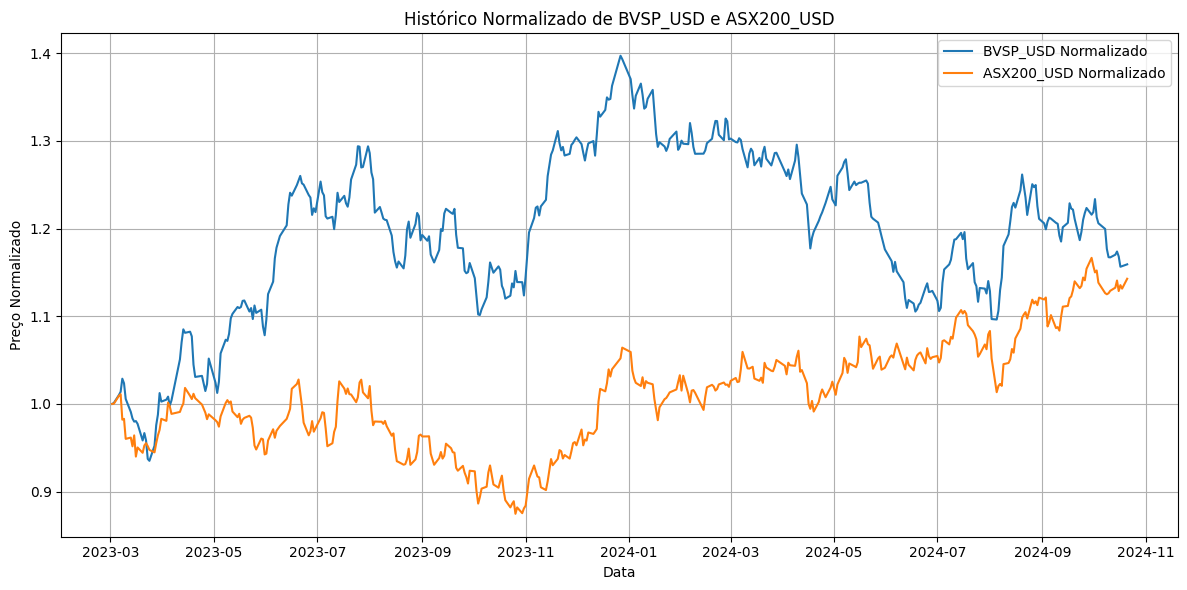

Dados atualizados com sucesso no Google Sheets!


In [ ]:
# Instalar as bibliotecas necessárias
!pip install --upgrade gspread
!pip install --upgrade google-auth-oauthlib
!pip install yfinance --upgrade --no-cache-dir
!pip install mplfinance

# Importar as bibliotecas
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import gspread
from google.colab import auth
from google.auth import default
import datetime

# Autenticar no Google Colab
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Definir os tickers
tickers = ['^BVSP', '^AXJO', 'USDBRL=X', 'AUDUSD=X']

# Calcular a data de início (600 dias atrás)
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=600)

# Obter os dados históricos dos últimos 600 dias
dados = yf.download(tickers, start=start_date, end=end_date, interval='1d')

# Verificar os tickers disponíveis
print("Tickers disponíveis:", dados.columns.levels[1])

# Preços de fechamento
dados_fechamento = dados['Close'].copy()
dados_fechamento.reset_index(inplace=True)
dados_fechamento.rename(columns={'Date': 'Data'}, inplace=True)

# Converter os preços para USD usando as taxas de câmbio
# Para ^BVSP (BRL para USD) e ASX200 (AUD para USD)
dados_fechamento['BVSP_USD'] = dados_fechamento['^BVSP'] / dados_fechamento['USDBRL=X']
dados_fechamento['ASX200_USD'] = dados_fechamento['^AXJO'] * dados_fechamento['AUDUSD=X']

# Criar um DataFrame com as colunas relevantes
dados_merged = dados_fechamento[['Data', 'BVSP_USD', 'ASX200_USD']].copy()

# Remover linhas com valores faltantes
dados_merged.dropna(inplace=True)

# Calcular a correlação entre os dois ativos
correlacao = dados_merged['BVSP_USD'].corr(dados_merged['ASX200_USD'])
print(f"Coeficiente de correlação entre BVSP_USD e ASX200_USD: {correlacao:.4f}")

# Normalizar os preços para facilitar a comparação
dados_merged['BVSP_USD_Norm'] = dados_merged['BVSP_USD'] / dados_merged['BVSP_USD'].iloc[0]
dados_merged['ASX200_USD_Norm'] = dados_merged['ASX200_USD'] / dados_merged['ASX200_USD'].iloc[0]

# Plotar os ativos normalizados no mesmo gráfico
plt.figure(figsize=(12, 6))
plt.plot(dados_merged['Data'], dados_merged['BVSP_USD_Norm'], label='BVSP_USD Normalizado')
plt.plot(dados_merged['Data'], dados_merged['ASX200_USD_Norm'], label='ASX200_USD Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço Normalizado')
plt.title('Histórico Normalizado de BVSP_USD e ASX200_USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Enviar os dados para o Google Sheets
# Criar ou abrir a planilha no Google Sheets
nome_planilha = 'Dados Financeiros BVSP e ASX200'

try:
    planilha = gc.open(nome_planilha)
except gspread.exceptions.SpreadsheetNotFound:
    # Criar uma nova planilha
    planilha = gc.create(nome_planilha)
    # Compartilhar a planilha com o seu e-mail (opcional)
    # planilha.share('seu_email@gmail.com', perm_type='user', role='writer')

# Selecionar a primeira folha
worksheet = planilha.get_worksheet(0)

# Substituir valores NaN ou Inf por zero
dados_merged_clean = dados_merged.replace([np.nan, np.inf, -np.inf], 0)

# Converter a coluna 'Data' para string
dados_merged_clean['Data'] = dados_merged_clean['Data'].astype(str)

# Converter o DataFrame para uma lista de listas
dados_lista = [dados_merged_clean.columns.values.tolist()] + dados_merged_clean.values.tolist()

# Limpar a planilha existente
worksheet.clear()

# Atualizar os valores na planilha
worksheet.update(dados_lista)

# Exibir mensagem de conclusão
print("Dados atualizados com sucesso no Google Sheets!")


In [ ]:
# Instalar as bibliotecas necessárias
!pip install --upgrade gspread
!pip install --upgrade google-auth-oauthlib
!pip install yfinance --upgrade --no-cache-dir

# Importar as bibliotecas
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import gspread
from google.colab import auth
from google.auth import default
import datetime

# Autenticar no Google Colab
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Definir os tickers
tickers = ['^BVSP', '^AXJO', 'USDBRL=X', 'AUDUSD=X']

# Calcular a data de início (600 dias atrás)
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=600)

# Obter os dados históricos dos últimos 600 dias
dados = yf.download(tickers, start=start_date, end=end_date, interval='1d')

# Verificar os tickers disponíveis
print("Tickers disponíveis:", dados.columns.levels[1])

# Preços de abertura e fechamento
dados_abertura = dados['Open'].copy()
dados_abertura.reset_index(inplace=True)
dados_abertura.rename(columns={'Date': 'Data'}, inplace=True)

dados_fechamento = dados['Close'].copy()
dados_fechamento.reset_index(inplace=True)
dados_fechamento.rename(columns={'Date': 'Data'}, inplace=True)

# Mesclar dados de abertura e fechamento
dados_merged = pd.merge(dados_abertura, dados_fechamento, on='Data', suffixes=('_Abertura', '_Fechamento'))

# Converter os preços para USD usando as taxas de câmbio
# Para ^BVSP (BRL para USD) e ^AXJO (AUD para USD)
dados_merged['BVSP_USD_Abertura'] = dados_merged['^BVSP_Abertura'] / dados_merged['USDBRL=X_Abertura']
dados_merged['BVSP_USD_Fechamento'] = dados_merged['^BVSP_Fechamento'] / dados_merged['USDBRL=X_Fechamento']
dados_merged['AXJO_USD_Abertura'] = dados_merged['^AXJO_Abertura'] * dados_merged['AUDUSD=X_Abertura']
dados_merged['AXJO_USD_Fechamento'] = dados_merged['^AXJO_Fechamento'] * dados_merged['AUDUSD=X_Fechamento']

# Calcular os retornos logarítmicos
dados_merged['Retorno_Log_BVSP'] = np.log(dados_merged['BVSP_USD_Fechamento'] / dados_merged['BVSP_USD_Abertura'])
dados_merged['Retorno_Log_AXJO'] = np.log(dados_merged['AXJO_USD_Fechamento'] / dados_merged['AXJO_USD_Abertura'])

# Remover linhas com valores faltantes
dados_merged.dropna(inplace=True)

# Simulação da estratégia
capital_inicial_total = 1000  # Capital inicial total disponível para negociação
capital_total = capital_inicial_total
capital_inicial_por_operacao = 1000  # Capital investido em cada operação (até o máximo do capital disponível)
num_operacoes = 0
num_acertos = 0

for i in range(1, len(dados_merged)):
    # Variação percentual do fechamento do ASX200 em relação ao fechamento anterior
    variacao_axjo = (dados_merged.iloc[i]['AXJO_USD_Fechamento'] - dados_merged.iloc[i-1]['AXJO_USD_Fechamento']) / dados_merged.iloc[i-1]['AXJO_USD_Fechamento'] * 100

    # Simular apenas nos dias em que a bolsa australiana teve variação positiva ou negativa significativa
    if variacao_axjo > 0.5:
        # Verificar se temos capital suficiente para a operação
        if capital_total >= capital_inicial_por_operacao:
            num_operacoes += 1
            # Comprar na abertura do BVSP no dia seguinte
            preco_compra = dados_merged.iloc[i]['BVSP_USD_Abertura']
            # Definir preços de Take Profit e Stop Loss
            take_profit = preco_compra * 1.01  # 1% acima
            stop_loss = preco_compra * 0.992   # 0.8% abaixo

            # Simular até o fechamento do dia
            preco_fechamento = dados_merged.iloc[i]['BVSP_USD_Fechamento']

            # Verificar se atingiu o Take Profit ou Stop Loss
            atingiu_tp = preco_fechamento >= take_profit
            atingiu_sl = preco_fechamento <= stop_loss

            # Cálculo do resultado da operação
            if atingiu_tp:
                lucro = capital_inicial_por_operacao * 0.01  # 1% de lucro
                capital_total += lucro
                num_acertos += 1
            elif atingiu_sl:
                perda = capital_inicial_por_operacao * 0.008  # 0.8% de perda
                capital_total -= perda
            else:
                # Resultado até o fechamento
                variacao = (preco_fechamento - preco_compra) / preco_compra
                resultado = capital_inicial_por_operacao * variacao
                capital_total += resultado
                if resultado > 0:
                    num_acertos += 1

    elif variacao_axjo < -0.5:
        # Verificar se temos capital suficiente para a operação
        if capital_total >= capital_inicial_por_operacao:
            num_operacoes += 1
            # Vender (operar vendido) na abertura do BVSP no dia seguinte
            preco_venda = dados_merged.iloc[i]['BVSP_USD_Abertura']
            # Definir preços de Take Profit e Stop Loss
            take_profit = preco_venda * 0.99   # 1% abaixo
            stop_loss = preco_venda * 1.008    # 0.8% acima

            # Simular até o fechamento do dia
            preco_fechamento = dados_merged.iloc[i]['BVSP_USD_Fechamento']

            # Verificar se atingiu o Take Profit ou Stop Loss
            atingiu_tp = preco_fechamento <= take_profit
            atingiu_sl = preco_fechamento >= stop_loss

            # Cálculo do resultado da operação
            if atingiu_tp:
                lucro = capital_inicial_por_operacao * 0.01  # 1% de lucro
                capital_total += lucro
                num_acertos += 1
            elif atingiu_sl:
                perda = capital_inicial_por_operacao * 0.008  # 0.8% de perda
                capital_total -= perda
            else:
                # Resultado até o fechamento
                variacao = (preco_venda - preco_fechamento) / preco_venda
                resultado = capital_inicial_por_operacao * variacao
                capital_total += resultado
                if resultado > 0:
                    num_acertos += 1

# Calcular a rentabilidade e margem de acerto
if num_operacoes > 0:
    rentabilidade_total = capital_total - capital_inicial_total  # Rentabilidade total
    margem_acerto = (num_acertos / num_operacoes) * 100
    print(f"Total de operações: {num_operacoes}")
    print(f"Número de acertos: {num_acertos}")
    print(f"Margem de acerto: {margem_acerto:.2f}%")
    print(f"Rentabilidade total: R$ {rentabilidade_total:.2f}")
    print(f"Valor final acumulado: R$ {capital_total:.2f}")
else:
    print("Nenhuma operação foi realizada com base nos critérios estabelecidos.")

# Enviar os dados para o Google Sheets
# Criar ou abrir a planilha no Google Sheets
nome_planilha = 'Dados Financeiros BVSP e ASX200'

try:
    planilha = gc.open(nome_planilha)
except gspread.exceptions.SpreadsheetNotFound:
    # Criar uma nova planilha
    planilha = gc.create(nome_planilha)
    # Compartilhar a planilha com o seu e-mail (opcional)
    # planilha.share('seu_email@gmail.com', perm_type='user', role='writer')

# Selecionar a primeira folha
worksheet = planilha.get_worksheet(0)

# Substituir valores NaN ou Inf por zero
dados_merged_clean = dados_merged.replace([np.nan, np.inf, -np.inf], 0)

# Converter a coluna 'Data' para string
dados_merged_clean['Data'] = dados_merged_clean['Data'].astype(str)

# Converter o DataFrame para uma lista de listas
dados_lista = [dados_merged_clean.columns.values.tolist()] + dados_merged_clean.values.tolist()

# Limpar a planilha existente
worksheet.clear()

# Atualizar os valores na planilha
worksheet.update(dados_lista)

# Exibir mensagem de conclusão
print("Dados atualizados com sucesso no Google Sheets!")


[*********************100%***********************]  4 of 4 completed


Tickers disponíveis: Index(['AUDUSD=X', 'USDBRL=X', '^AXJO', '^BVSP'], dtype='object', name='Ticker')
Total de operações: 7
Número de acertos: 3
Margem de acerto: 42.86%
Rentabilidade total: R$ -5.93
Valor final acumulado: R$ 994.07
Dados atualizados com sucesso no Google Sheets!


MODELO ESTOCASTICO DE AZUL4 com PHI constante

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
from cvxopt import matrix, solvers

# Função para obter os preços de fechamento dos ativos
def get_close_prices(tickers, period):
    data = yf.download(tickers, period=period)['Adj Close']
    return data

# Função para calcular o retorno logarítmico
def calculate_log_return(prices):
    return np.log(prices / prices.shift(1)).dropna()

# Função para calcular a matriz de correlação
def calculate_correlation(log_returns):
    return log_returns.corr()

# Função para calcular a matriz de distância euclidiana
def calculate_euclidean_matrix(log_returns):
    n = log_returns.shape[1]
    euclidean_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            euclidean_matrix[i, j] = euclidean(log_returns.iloc[:, i], log_returns.iloc[:, j])
    return pd.DataFrame(euclidean_matrix, index=log_returns.columns, columns=log_returns.columns)

# Função para plotar a evolução do retorno
def plot_returns(log_returns, period):
    cumulative_returns = (1 + log_returns).cumprod() - 1
    cumulative_returns.plot(figsize=(10, 6))
    plt.title(f'Evolução do Retorno dos Ativos - {period}')
    plt.xlabel('Data')
    plt.ylabel('Retorno Cumulativo')
    plt.legend(loc='best')
    plt.show()

# Função para plotar a evolução dos preços
def plot_prices(close_prices, period):
    close_prices.plot(figsize=(10, 6))
    plt.title(f'Evolução dos Preços dos Ativos - {period}')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.legend(loc='best')
    plt.show()

# Função para otimizar o portfólio usando o modelo de Markowitz
def optimize_portfolio(log_returns):
    n = log_returns.shape[1]
    mean_returns = log_returns.mean() * 252  # Annualize returns
    cov_matrix = log_returns.cov() * 252  # Annualize covariance matrix

    P = matrix(cov_matrix.values)
    q = matrix(np.zeros(n))
    G = matrix(-np.eye(n))
    h = matrix(np.zeros(n))
    A = matrix(1.0, (1, n))
    b = matrix(1.0)

    sol = solvers.qp(P, q, G, h, A, b)
    weights = np.array(sol['x']).flatten()
    return weights

# Função para simulação de Monte Carlo com distribuições específicas
def monte_carlo_simulation(log_returns, num_portfolios=10000):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    mean_returns = log_returns.mean() * 252
    cov_matrix = log_returns.cov() * 252
    np.random.seed(42)

    for i in range(num_portfolios):
        weights = np.random.random(len(log_returns.columns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_return = np.sum(weights * mean_returns)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        results[0, i] = portfolio_return
        results[1, i] = portfolio_std_dev
        results[2, i] = results[0, i] / results[1, i]  # Sharpe Ratio

    weights_record = np.array(weights_record)

    max_return_idx = np.argmax(results[0])
    min_std_dev_idx = np.argmin(results[1])
    max_sharpe_idx = np.argmax(results[2])

    max_return_weights = weights_record[max_return_idx]
    min_std_dev_weights = weights_record[min_std_dev_idx]
    max_sharpe_weights = weights_record[max_sharpe_idx]

    avg_1_2_weights = (max_return_weights + min_std_dev_weights) / 2
    avg_2_3_weights = (min_std_dev_weights + max_sharpe_weights) / 2

    return {
        "Max Return": max_return_weights,
        "Min Std Dev": min_std_dev_weights,
        "Max Sharpe": max_sharpe_weights,
        "Avg Return-Min Std Dev": avg_1_2_weights,
        "Avg Min Std Dev-Max Sharpe": avg_2_3_weights
    }

# Função para processar os dados e gerar resultados
def process_data_for_period(tickers, period):
    try:
        close_prices = get_close_prices(tickers, period)
        log_returns = calculate_log_return(close_prices)

        # Verificação para evitar cálculos em caso de dados insuficientes
        if log_returns.empty:
            print(f"\nDados insuficientes para o período de {period}.")
            return

        std_dev = log_returns.std()
        correlation_matrix = calculate_correlation(log_returns)
        euclidean_matrix = calculate_euclidean_matrix(log_returns)
        optimal_weights = optimize_portfolio(log_returns)
        optimal_weights_percent = optimal_weights * 100
        mc_distributions = monte_carlo_simulation(log_returns)

        print(f"\nResultados para o período de {period}:")
        print("Desvio Padrão dos Retornos Logarítmicos:")
        print(std_dev)
        print("\nMatriz de Correlação:")
        print(correlation_matrix)
        print("\nMatriz de Distância Euclidiana:")
        print(euclidean_matrix)
        print("\nPesos Ótimos para o Portfólio (em percentuais):")
        print(optimal_weights_percent)
        print("\nDistribuições da Simulação de Monte Carlo:")
        for key, value in mc_distributions.items():
            print(f"{key}: {value * 100}")  # Convertendo para percentuais

        # Classificação das posições por tamanho sugerido
        ranking = pd.DataFrame(optimal_weights_percent, index=log_returns.columns, columns=['Weight'])
        ranking = ranking.sort_values(by='Weight', ascending=False)
        ranking['Rank'] = range(1, len(ranking) + 1)
        print("\nRanking das posições sugeridas:")
        print(ranking)

        plot_prices(close_prices, period)
        plot_returns(log_returns, period)

        # Plotar a matriz de correlação
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0, vmin=-1, vmax=1)
        plt.title(f'Matriz de Correlação - {period}')
        plt.show()

        # Plotar a matriz de distância euclidiana
        plt.figure(figsize=(10, 8))
        sns.heatmap(euclidean_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title(f'Matriz de Distância Euclidiana - {period}')
        plt.show()

    except Exception as e:
        print(f"Erro ao processar dados para o período de {period}: {e}")

# Entrada dos ativos
tickers = ['AZUL4.SA', 'TSM', 'PRIO3.SA', 'TSLA', 'DAL', 'CAT', 'INTC', 'LJQQ3.SA', 'BRSR6.SA', 'GGBR4.SA']

# Processar dados para diferentes períodos
periods = ["1y", "6mo", "3mo", "1mo"]
for period in periods:
    process_data_for_period(tickers, period)


/tmp/ipython-input-230597196.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period=period)['Adj Close']
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-230597196.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period=period)['Adj Close']


Erro ao processar dados para o período de 1y: 'Adj Close'


[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-230597196.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period=period)['Adj Close']


Erro ao processar dados para o período de 6mo: 'Adj Close'


[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-230597196.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period=period)['Adj Close']
[                       0%                       ]

Erro ao processar dados para o período de 3mo: 'Adj Close'


[*********************100%***********************]  10 of 10 completed

Erro ao processar dados para o período de 1mo: 'Adj Close'


phi variavel

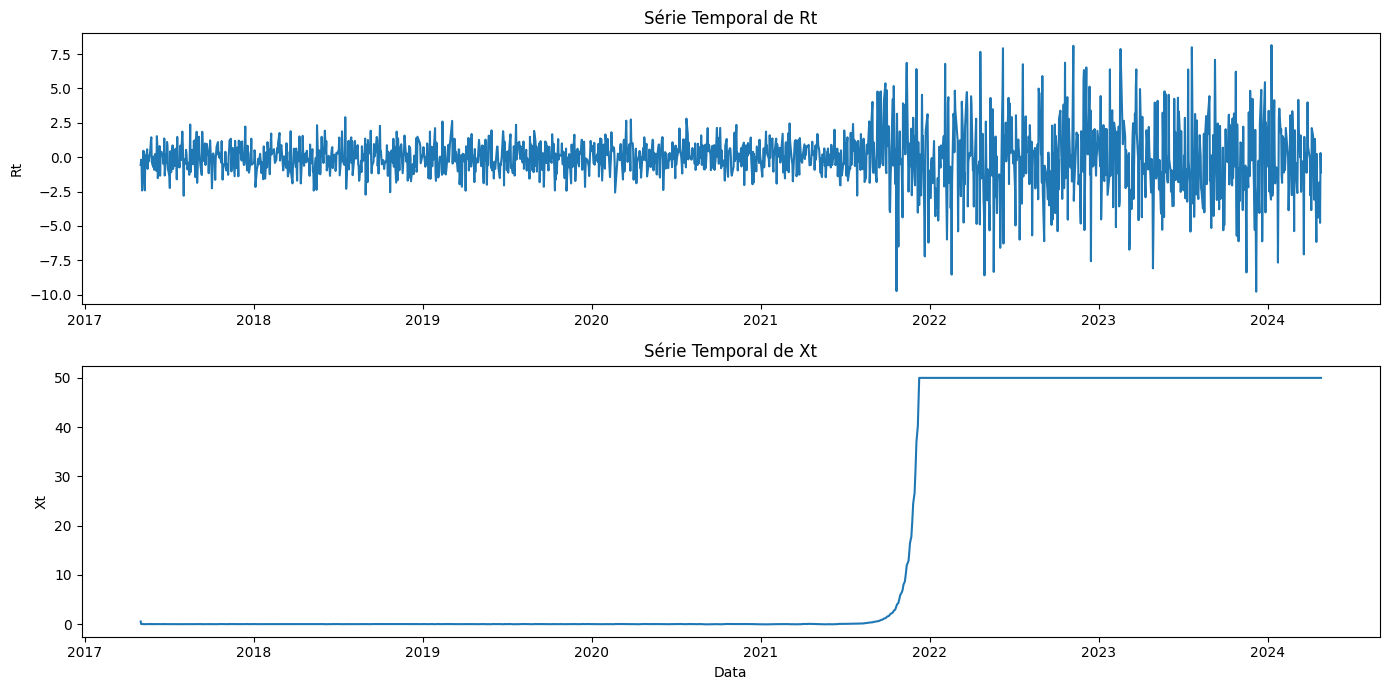

In [ ]:
# Instalação de bibliotecas necessárias para acesso ao Google Sheets e manipulação de dados
!pip install gspread pandas gspread-dataframe

import gspread
from google.colab import auth
from google.auth import default
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gspread_dataframe import get_as_dataframe

# Autenticação e autorização para acessar Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Abertura da planilha e leitura dos dados
sh = gc.open('AZUL4 Dados Históricos (1)')  # Certifique-se de que este é o nome exato da sua planilha
worksheet = sh.get_worksheet(0)  # Seleciona a primeira aba da planilha

# Carregando o DataFrame e inspecionando os nomes das colunas
df = get_as_dataframe(worksheet, evaluate_formulas=True, skiprows=1).dropna(how='all')

# Assegure-se de que o nome das colunas corresponde aos dados
df.rename(columns={df.columns[0]: 'Data', df.columns[1]: 'Último'}, inplace=True)

# Correção de tipos de dados e limpeza do dataframe
df['Último'] = pd.to_numeric(df['Último'].str.replace(',', '.'), errors='coerce')
df['Data'] = pd.to_datetime(df['Data'], errors='coerce', dayfirst=True)
df.dropna(subset=['Último', 'Data'], inplace=True)
df.sort_values('Data', inplace=True)  # Garantir que os dados estão em ordem cronológica

# Removendo colunas não utilizadas
cols_to_use = ['Data', 'Último']
df = df[cols_to_use]

# Continuação do código com a definição de parâmetros e variáveis iniciais...

# Definição de parâmetros e variáveis iniciais
x0 = df['Último'].iloc[0]
n = len(df)
eps = np.random.normal(0, 0.01, n)
phi_values = np.zeros(n)
xt = np.zeros(n)
phi_values[0] = np.random.gamma(shape=0.1, scale=1)
xt[0] = phi_values[0] * x0 + eps[0]

# Cálculo da série temporal xt com phi variável
max_xt = 0  # Usamos um valor máximo para xt para controlar o crescimento exponencial
for t in range(1, n):
    increment_phi = np.random.gamma(shape=0.1, scale=1)
    phi_values[t] = phi_values[t-1] + increment_phi * 0.01  # Incremento controlado
    xt[t] = phi_values[t] * xt[t-1] + eps[t]
    # Controle para evitar valores extremos em xt
    if xt[t] > max_xt:
        max_xt = xt[t]  # Atualize o valor máximo de xt
    if max_xt > 50:  # Controle para prevenir crescimento explosivo
        xt[t] = 50

# Preparação de Rt, limitando o desvio padrão a um valor máximo
max_sd = 3.0  # Valor máximo para o desvio padrão
stdev = np.minimum(np.exp(xt), max_sd)  # Limita o desvio padrão a max_sd
Rt = np.random.normal(0, stdev)

# Plotagem dos resultados
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Data'], Rt)
plt.title('Série Temporal de Rt')
plt.ylabel('Rt')

plt.subplot(2, 1, 2)
plt.plot(df['Data'], xt)
plt.title('Série Temporal de Xt')
plt.ylabel('Xt')
plt.xlabel('Data')
plt.tight_layout()
plt.show()



In [ ]:
#EXPRIMENTAL AGORA
# Assumindo que o restante do código foi executado corretamente e você tem 'xt' e 'phi_values'

# Previsão simplificada dos próximos 5 dias de volatilidade
# Estamos usando o último valor de 'phi' para prever a volatilidade futura
last_phi = phi_values[-1]
future_xt = np.zeros(5)
future_xt[0] = last_phi * xt[-1]  # o primeiro dia de previsão

# Como estamos fazendo uma previsão, vamos assumir que não há novos choques (eps = 0)
for i in range(1, 5):
    future_xt[i] = last_phi * future_xt[i-1]  # repetindo o último valor da volatilidade

# Adicionando as datas previstas ao dataframe
last_date = df['Data'].iloc[-1]
new_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]
predicted_vol_df = pd.DataFrame({
    'Data': new_dates,
    'Previsão Volatilidade': future_xt
})

print(predicted_vol_df)


        Data  Previsão Volatilidade
0 2024-04-26              88.149965
1 2024-04-27             155.408325
2 2024-04-28             273.984766
3 2024-04-29             483.034949
4 2024-04-30             851.590271


In [ ]:
# Instalação das bibliotecas necessárias
!pip install yfinance
!pip install pandas

# Importação das bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Função para analisar os dados da ação
def analyze_stock(ticker):
    # Define as datas de início e fim para a coleta de dados
    end_date = datetime.now()
    start_date = end_date - timedelta(days=730)  # Estendido para dois anos

    # Baixa os dados do Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Verifica se há dados disponíveis
    if data.empty:
        return "No data available for the ticker."

    # Calcula os preços de fechamento mais recentes por mês, semana e dia
    last_month_close = data['Close'].resample('M').last().dropna().iloc[-1] if not data['Close'].resample('M').last().empty else "No monthly data"
    last_week_close = data['Close'].resample('W').last().dropna().iloc[-1] if not data['Close'].resample('W').last().empty else "No weekly data"
    last_day_close = data['Close'].iloc[-1] if not data['Close'].empty else "No daily data"

    # Identifica novos máximos e mínimos dos últimos 100 dias
    rolling_max = data['Close'].rolling(window=100).max()
    rolling_min = data['Close'].rolling(window=100).min()
    new_highs = (data['Close'] == rolling_max).sum()
    new_lows = (data['Close'] == rolling_min).sum()

    # Calcula desvio padrão das variações de preço entre novos máximos e mínimos
    new_max_values = data['Close'][data['Close'] == rolling_max]
    new_min_values = data['Close'][data['Close'] == rolling_min]
    price_diff = new_max_values - new_min_values
    std_dev = price_diff.std() if not price_diff.empty else "No price difference data"

    # Calcula média da variação de preços e prepara as alocações
    mean_variation = price_diff.mean() if not price_diff.empty else 0
    allocation_amount = mean_variation / 3 / 3
    last_event_date = max(new_max_values.index[-1], new_min_values.index[-1]) if not new_max_values.empty and not new_min_values.empty else datetime.now()
    allocation_dates = {
        '28 days after last event': last_event_date + timedelta(days=28),
        '45 days after last event': last_event_date + timedelta(days=45),
        '80 days after last event': last_event_date + timedelta(days=80)
    }

    # Retorna um dicionário com todos os resultados
    return {
        'Last Month Close': last_month_close,
        'Last Week Close': last_week_close,
        'Last Day Close': last_day_close,
        'New Highs Count': new_highs,
        'New Lows Count': new_lows,
        'Standard Deviation': std_dev,
        'Mean Variation': mean_variation,
        'Allocation Amount': allocation_amount,
        'Allocation Dates': allocation_dates
    }

# Usando a função para o ticker AZUL4.SA
results = analyze_stock('AZUL4.SA')
print(results)


[*********************100%%**********************]  1 of 1 completed

{'Last Month Close': 9.739999771118164, 'Last Week Close': 9.739999771118164, 'Last Day Close': 9.739999771118164, 'New Highs Count': 14, 'New Lows Count': 34, 'Standard Deviation': nan, 'Mean Variation': nan, 'Allocation Amount': nan, 'Allocation Dates': {'28 days after last event': Timestamp('2024-05-23 00:00:00'), '45 days after last event': Timestamp('2024-06-09 00:00:00'), '80 days after last event': Timestamp('2024-07-14 00:00:00')}}


# tabela de dados gerais

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bcb.gov.br/'
response = requests.get(url)

# Verifique se a requisição foi bem-sucedida
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Localize o elemento pela classe
    selic_element = soup.find('div', class_='percentual light mr-2')

    if selic_element:
        selic_value = selic_element.text.strip()
        print('Taxa Selic atual:', selic_value)
    else:
        print('Elemento contendo a Taxa Selic não encontrado.')
else:
    print('Não foi possível obter a resposta da página.')



Elemento contendo a Taxa Selic não encontrado.


In [ ]:

dados_acoes.head()


In [ ]:
# Alguns tipos de mercado

# 10 - Mercado à vista
# 70 - Opções de Compra
# 80 - Opções de Venda

dados_acoes[dados_acoes['tipo_mercado']==10]

In [ ]:
import matplotlib.pyplot as plt

dados_acoes[(dados_acoes['tipo_mercado']==10)&(dados_acoes['cod_negociacao']=='PETR4')][['data_pregao','preco_ultimo_negocio']]




```
# Isto está formatado como código
```

# historico de correlação 100 dias

In [ ]:
import yfinance as yf
import pandas as pd

# Definindo os símbolos das ações
stocks = [
    "bbdc3.SA", "logg3.SA", "petz3.SA", "pomo4.SA", "anim3.SA",
          "roxo34.SA", "smto3.SA", "^BVSP"]

# Obtendo os dados históricos para as ações
data = yf.download(stocks, period="100d", interval="1d")['Adj Close']

# Removendo colunas com mais de 50% de valores NaN e linhas com qualquer valor NaN
data = data.dropna(axis=1, thresh=int(0.5*len(data))).dropna()

# Verificando se ainda há dados suficientes para calcular a correlação
if data.shape[1] > 1:
    # Calculando a matriz de correlação
    correlation_matrix = data.corr()
else:
    correlation_matrix = "Não há dados suficientes para calcular a correlação."

correlation_matrix




[*********************100%%**********************]  8 of 8 completed


Ticker,ANIM3.SA,BBDC3.SA,LOGG3.SA,PETZ3.SA,POMO4.SA,ROXO34.SA,SMTO3.SA,^BVSP
Ticker,,,,,,,,
ANIM3.SA,1.000000,-0.340479,0.274641,0.453830,0.537230,0.566656,-0.340335,0.233852
BBDC3.SA,-0.340479,1.000000,-0.157835,-0.175108,-0.295986,-0.807271,0.246470,0.579057
LOGG3.SA,0.274641,-0.157835,1.000000,0.817608,0.005421,0.328826,0.435819,-0.141156
PETZ3.SA,0.453830,-0.175108,0.817608,1.000000,0.110246,0.359324,0.300872,-0.070342
POMO4.SA,0.537230,-0.295986,0.005421,0.110246,1.000000,0.661368,-0.318351,0.001279
ROXO34.SA,0.566656,-0.807271,0.328826,0.359324,0.661368,1.000000,-0.191552,-0.350894
SMTO3.SA,-0.340335,0.246470,0.435819,0.300872,-0.318351,-0.191552,1.000000,-0.194450
^BVSP,0.233852,0.579057,-0.141156,-0.070342,0.001279,-0.350894,-0.194450,1.000000


#grafico p/l e preço




In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt

# Definindo os símbolos das ações
stocks = ["ibov.SA"]

# Obtendo os dados históricos para a ação GRND3 nos últimos 11 meses
data = yf.download(stocks, period="48mo", interval="1d")['Adj Close']

# Plotando o gráfico do P/L histórico
data.plot(y='GRND3.SA', title='P/L Histórico da Ação GRND3', figsize=(12, 6))
plt.ylabel('P/L')
plt.xlabel('Data')

# Obtendo os dados históricos de preços para a ação GRND3
preco = yf.download(stocks, period="48mo", interval="1d")['Adj Close']

# Plotando o gráfico de evolução de preços
preco.plot(secondary_y=True, label='Preço', color='red')
plt.ylabel('Preço')
plt.xlabel('Data')

plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IBOV.SA']: Exception("%ticker%: Period '48mo' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IBOV.SA']: Exception("%ticker%: Period '48mo' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")


**markowitz 100 DIAS**


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Definindo os símbolos das ações
stocks = [
    "POMO4.SA", "AZUL4.SA", "USIM5.SA", "CPLE6.SA", "YDUQ3.SA",
    "COGN3.SA", "ANIM3.SA", "SEER3.SA", "CSED3.SA",
]

# Taxa livre de risco brasileira (Selic anualizada) - atualize conforme necessário
risk_free_rate = 0.0525

# Retornos esperados dos ativos (inserir valores)
expected_returns = np.array([0.10, 0.12, 0.11, 0.08, 0.09, 0.07, 0.15, 0.13, 0.14])

# Obtendo os dados históricos para as ações para calcular a volatilidade
data = yf.download(stocks, period="100d", interval="1d")['Adj Close']

# Calculando a matriz de covariância dos retornos diários para as ações
covariance_matrix = data.pct_change().cov()

# Número de ativos
num_assets = len(stocks)

# Funções de otimização
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

def portfolio_return(weights):
    return np.sum(expected_returns * weights)

def negative_sharpe_ratio(weights):
    ret = portfolio_return(weights)
    vol = portfolio_volatility(weights)
    return -(ret - risk_free_rate) / vol

def maximize_return(weights):
    return -portfolio_return(weights)

# Restrições
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))
initial_guess = num_assets * [1. / num_assets,]

# Otimização para o melhor índice de Sharpe
result_sharpe = minimize(negative_sharpe_ratio, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Otimização para o maior retorno
result_return = minimize(maximize_return, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Transformando os pesos em percentuais e imprimindo os resultados
print("Pesos para melhor índice de Sharpe (%):", np.round(result_sharpe.x * 100, 3))
print("Melhor índice de Sharpe:", np.round(-result_sharpe.fun, 3))

print("\nPesos para o maior retorno esperado (%):", np.round(result_return.x * 100, 3))
print("Maior retorno esperado:", np.round(-result_return.fun, 3))




[*********************100%%**********************]  9 of 9 completed

Pesos para melhor índice de Sharpe (%): [ 0.     0.     0.    23.387  0.     1.03   9.388 52.489 13.705]
Melhor índice de Sharpe: 4.705

Pesos para o maior retorno esperado (%): [  0.   0.   0.   0.   0.   0. 100.   0.   0.]
Maior retorno esperado: 0.15


matriz de covariancia

CORRELAÇÃO E COVARIANCIA TOTAL